**Name: Sunita Pradhan**

**Domain: Customer relationship**

**Project: Customer Personality Analysis**

**Tech Stack: Python, Machine Learning**

--------------

In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import missingno

In [3]:
#Loading data as dataframe
df = pd.read_csv("marketing_campaign.csv", sep='\t')
pd.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
#Rows and Columns
df.shape

(2240, 29)

In [5]:
#Brief info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

In [6]:
#Columns present in dataset
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
#Checking for null values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
#Checking for duplicate data
df.duplicated().sum()

0

In [9]:
#Creating a copy of dataframe
data = df.copy()

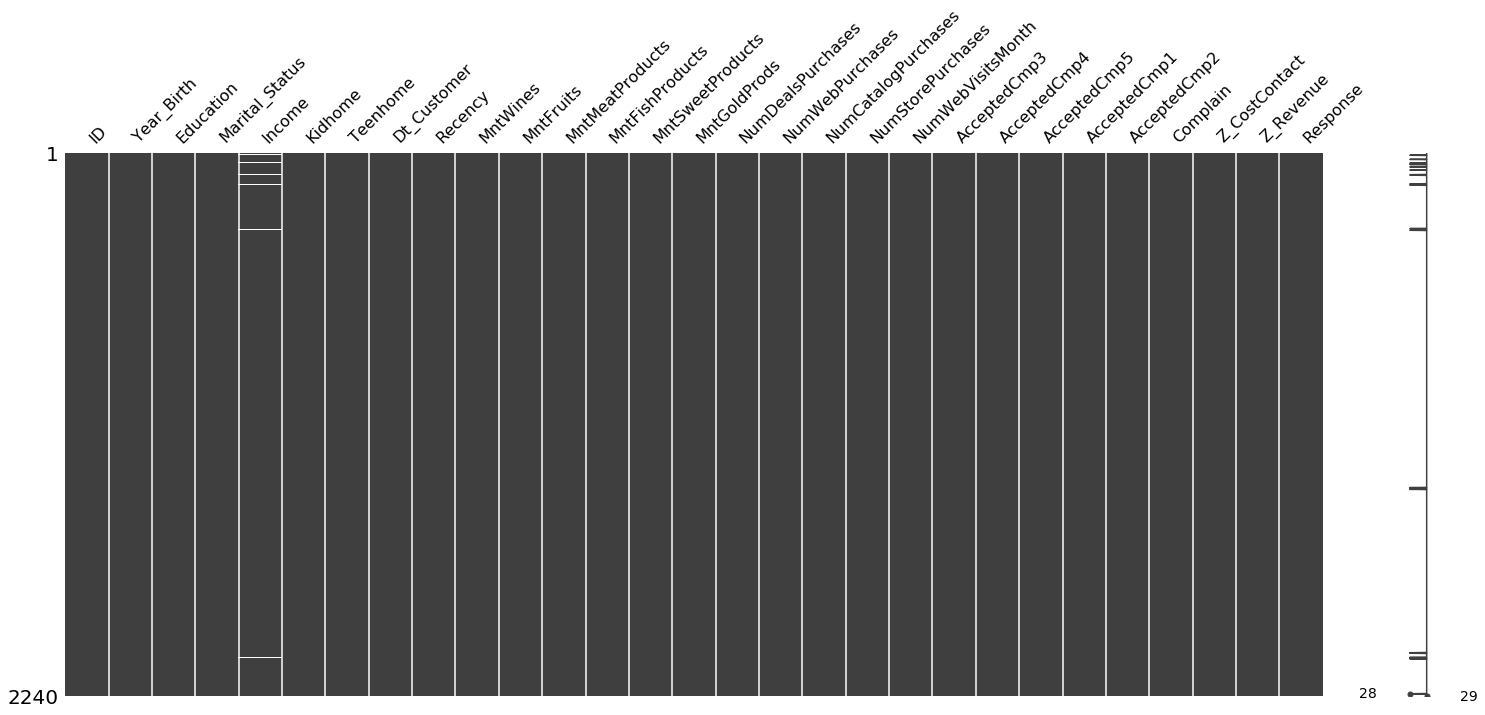

In [10]:
#Visualizing missing values
missingno.matrix(data)

In [11]:
# Droping missing values
# data = data.dropna()

# Only one feature has missing values. We will replace missing vales with the median 

median_value = df['Income'].median()
df['Income'].fillna(median_value, inplace=True)

In [12]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [13]:
# Year_Birth and Dt_Customer are contain date

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
#data['Year_Birth'] = pd.to_datetime(data['Year_Birth'])

In [14]:
data['ID'].nunique()

# There are 2216 no.of customer

2240

In [15]:
#For checking no.of unique values present in column

for column in data.columns:
    print(column,'--->', (data[column].nunique()))

ID ---> 2240
Year_Birth ---> 59
Education ---> 5
Marital_Status ---> 8
Income ---> 1974
Kidhome ---> 3
Teenhome ---> 3
Dt_Customer ---> 663
Recency ---> 100
MntWines ---> 776
MntFruits ---> 158
MntMeatProducts ---> 558
MntFishProducts ---> 182
MntSweetProducts ---> 177
MntGoldProds ---> 213
NumDealsPurchases ---> 15
NumWebPurchases ---> 15
NumCatalogPurchases ---> 14
NumStorePurchases ---> 14
NumWebVisitsMonth ---> 16
AcceptedCmp3 ---> 2
AcceptedCmp4 ---> 2
AcceptedCmp5 ---> 2
AcceptedCmp1 ---> 2
AcceptedCmp2 ---> 2
Complain ---> 2
Z_CostContact ---> 1
Z_Revenue ---> 1
Response ---> 2


In [16]:
#ID of The elder customer
data['ID'][data['Year_Birth'].min()]

6892

In [17]:
#ID of The younger customer
data['ID'][data['Year_Birth'].max()]

4122

In [18]:
#The Last cutomers enrollment date
max(data['Dt_Customer'])

Timestamp('2014-12-06 00:00:00')

In [19]:
#The First cutomers enrollment date
min(data['Dt_Customer'])

Timestamp('2012-01-08 00:00:00')

In [20]:
# Calculate the age of customers

data['Age'] = 2015 - data['Year_Birth']

In [21]:
#Creating a spent column for total amount spent

data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [22]:
data['NumAllPurchases'] = data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']

In [23]:
data['TotalAcceptedCmp'] = data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']+data['Response']

Text(0, 0.5, 'Age')

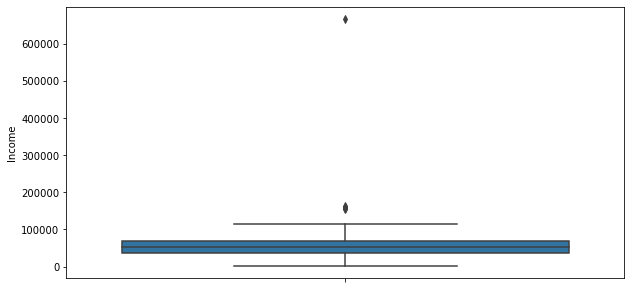

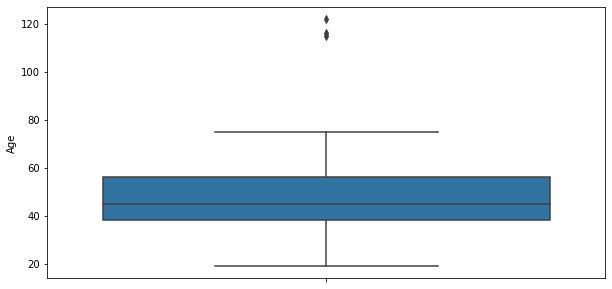

In [24]:
## To see any outliers are present or not in income and Age feature

plt.figure(figsize=(10,5))
sns.boxplot(y=data.Income)
plt.ylabel('Income')

plt.figure(figsize=(10,5))
sns.boxplot(y=data.Age)
plt.ylabel('Age')

Observation : Their are some customers whose age is greater than 100, and in income, some have income >600000, we need to remove them

In [25]:
#Removing outliers
data = data[data['Age'] < 100]
data = data[data['Income'] < 600000]

Text(0, 0.5, 'Age')

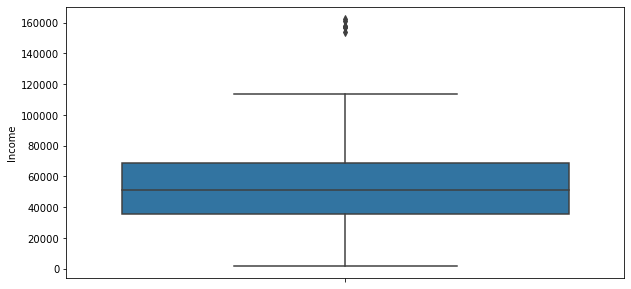

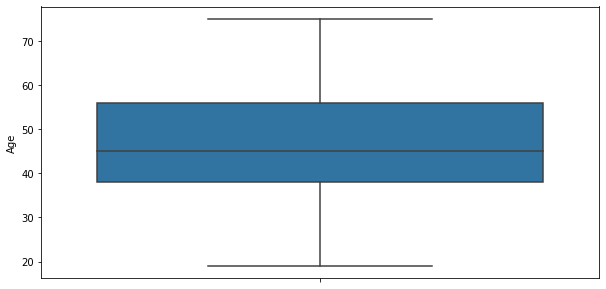

In [26]:
# After removing some ouliers
plt.figure(figsize=(10,5))
sns.boxplot(y=data.Income)
plt.ylabel('Income')

plt.figure(figsize=(10,5))
sns.boxplot(y=data.Age)
plt.ylabel('Age')

In [27]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

- Married and Together are staying with their partners.
- Single, Divorced, Widow, Alone, YOLO and Absurd are staying alone.

In [28]:
data[(data['Kidhome'])>=0]['Marital_Status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [29]:
data['Marital_Status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

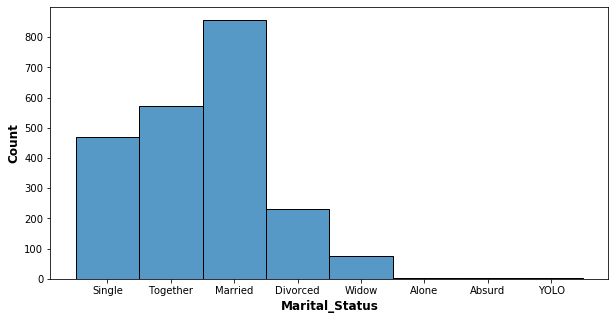

In [30]:
#Visualisation of Marital_Status

plt.figure(figsize=(10,5))
sns.histplot(data.Marital_Status)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Marital_Status", weight="bold", fontsize=12)
plt.show()

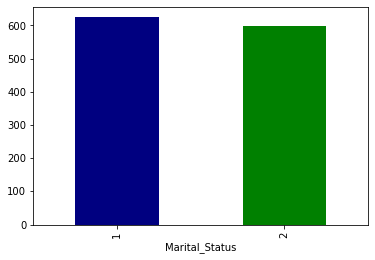

In [95]:
## Avg Spending wrt Marital Status

data.groupby('Marital_Status')['Spent'].mean().plot.bar(color=['navy', 'green'])
plt.show()

*Obsevation : Single customers spend slightly more than customer who are in relationship.*

In [32]:
data.groupby(['Marital_Status'])
data['Kidhome'].value_counts()

0    1281
1     885
2      46
Name: Kidhome, dtype: int64

In [33]:
#Creating a separate column for total no. of children 
data['Children'] = data.Kidhome + data.Teenhome

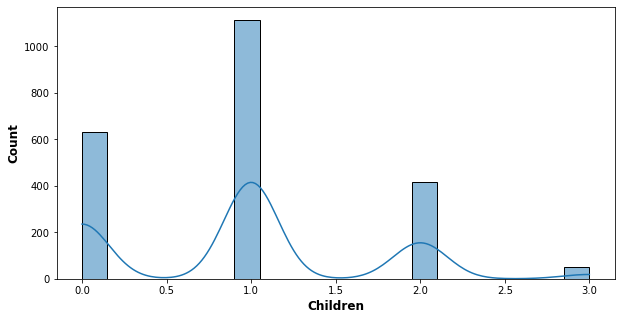

In [34]:
#Visualizing no.of Children

plt.figure(figsize=(10,5))
sns.histplot(data.Children, kde=True)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Children", weight="bold", fontsize=12)
plt.show()

*Obsevation : 50% of customers have 1 child, near about 29% do not have child, 19% have 2 children, and remaining have 3 children*

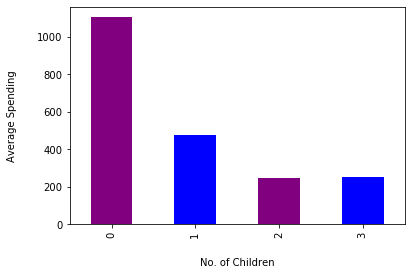

In [35]:
## Avg. Spendings wrt No of children

data.groupby('Children')['Spent'].mean().plot.bar(color=['Purple','blue'])
plt.xlabel('No. of Children', fontsize=10, labelpad=20)
plt.ylabel('Average Spending', fontsize=10, labelpad=20)
plt.show()

*Obsevation : Customers with 0 child have a high avg spending than customers with 1,2 and 3 children*

In [36]:
data.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,NumAllPurchases,TotalAcceptedCmp,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,58,1617,22,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,61,27,4,0,2


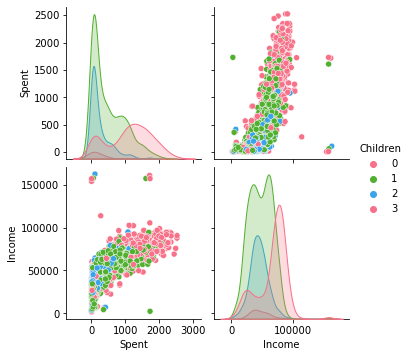

In [37]:
sns.pairplot(data , vars=['Spent','Income'] , hue='Children', palette='husl')

In [38]:
#Checking for unique values in childern column
data.Children.unique()

array([0, 2, 1, 3], dtype=int64)

In [39]:
#Creating a dataframe for better understanding

data[['ID','Kidhome', 'Teenhome', 'Children']]

,ID,Kidhome,Teenhome,Children
0,5524,0,0,0
1,2174,1,1,2
2,4141,0,0,0
3,6182,1,0,1
4,5324,1,0,1
...,...,...,...,...
2235,10870,0,1,1
2236,4001,2,1,3
2237,7270,0,0,0
2238,8235,0,1,1


In [40]:
# Replacing Marital_status as 1 for single and 2 for those who present with patners
data.replace({'Single':1,
              'Together':2,
              'Married':2,
              'Divorced':1,
              'Widow':1,
              'Alone':1,
              'Absurd':1,
              'YOLO':1}, inplace=True)

In [41]:
#For total family mamber number creating anew column
data['Family_member'] = data.Marital_Status + data.Children

In [42]:
data[['ID','Marital_Status', 'Children', 'Family_member']].head(3)

,ID,Marital_Status,Children,Family_member
0,5524,1,0,1
1,2174,1,2,3
2,4141,2,0,2


In [98]:
data.Family_member.unique()

array([1, 3, 2, 4, 5], dtype=int64)

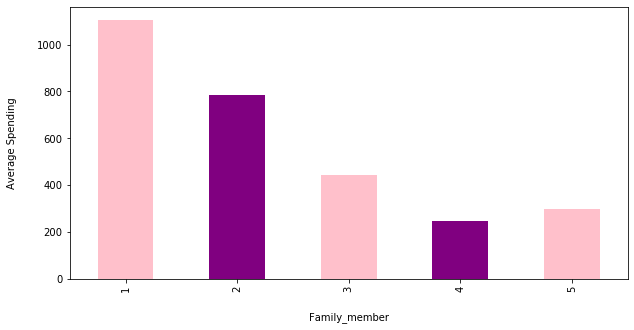

In [99]:
## Avg. Spendings wrt Family_member

plt.figure(figsize=(10,5))
data.groupby('Family_member')['Spent'].mean().plot.bar(color=['pink', 'purple'])
plt.xlabel('Family_member', fontsize=10, labelpad=20)
plt.ylabel('Average Spending', fontsize=10, labelpad=20)
plt.show()

*Observation : As per increasing family members approximatly total spending decreases*

In [43]:
data.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [44]:
data[['ID', 'Education']].head(3)

,ID,Education
0,5524,Graduation
1,2174,Graduation
2,4141,Graduation


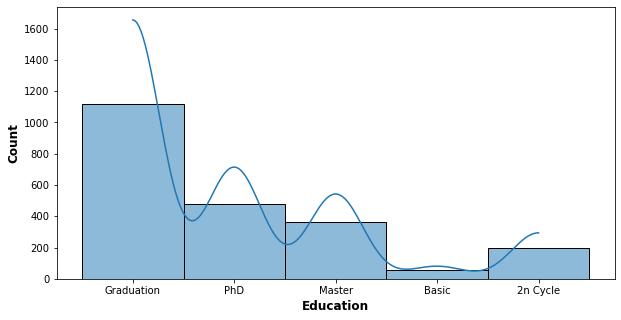

In [45]:
#Education Graph

plt.figure(figsize=(10,5))
sns.histplot(data.Education, kde=True)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education", weight="bold", fontsize=12)
plt.show()

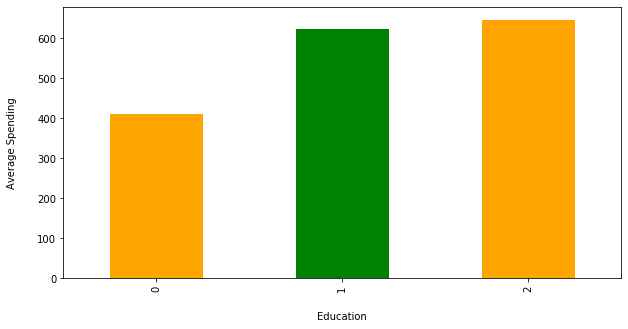

In [113]:
## Avg. Spendings wrt Education

plt.figure(figsize=(10,5))
data.groupby('Education')['Spent'].mean().plot.bar(color=['orange', 'green'])
plt.xlabel('Education', fontsize=10, labelpad=20)
plt.ylabel('Average Spending', fontsize=10, labelpad=20)
plt.show()

*Obsevation : Customer with basic education have very less Avg. Spendings. Customer with different qualification have similar kind of avg. spendings.*

In [47]:
#As it is a categorical column converting the values to numerical 
data['Education'] = data['Education'].replace({'Basic':0,
                                               '2n Cycle':0, 'Graduation':1,
                                               'Master':2, 
                                               'PhD':2})

In [48]:
# Create different age group from Age 

data.loc[(data['Age'] >= 13) & (data['Age'] <= 19), 'Age_Group'] = 'Teen'
data.loc[(data['Age'] >= 20) & (data['Age'] <= 39), 'Age_Group'] = 'Adult'
data.loc[(data['Age'] >= 40) & (data['Age'] <= 59), 'Age_Group'] = 'Middle Age Adult'
data.loc[data['Age'] >= 60, 'Age_Group'] = 'Senior Adult'

Text(0, 0.5, 'Counts')

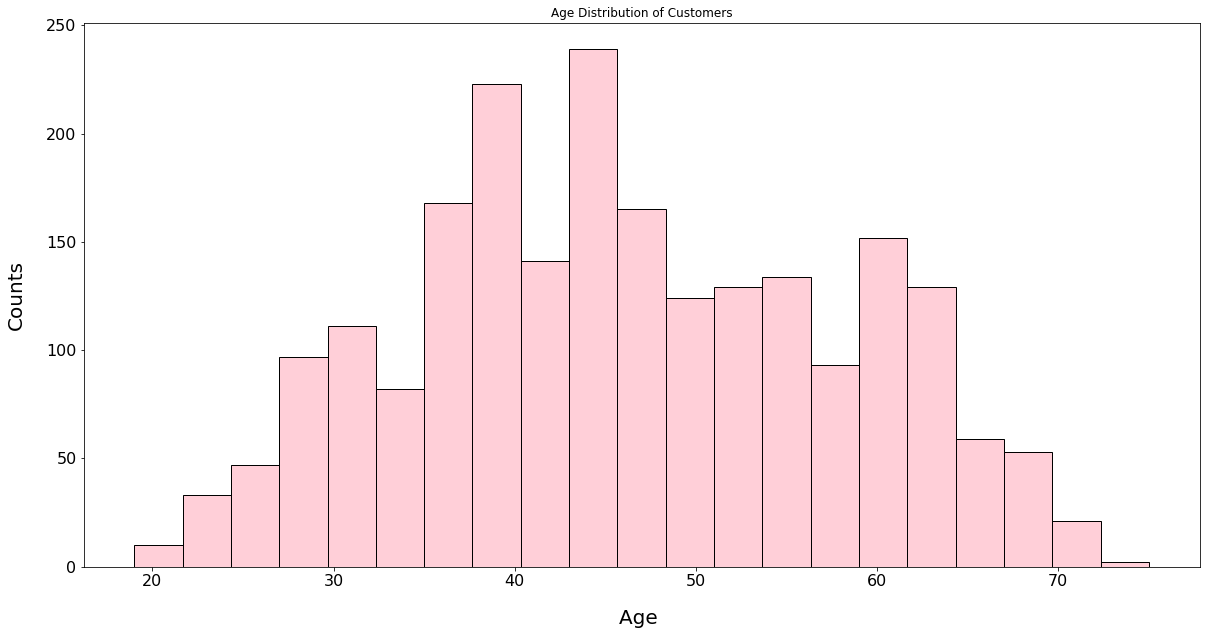

In [110]:
# distribution of Age

plt.figure(figsize=(20,10))
ax = sns.histplot(data = data.Age, color='pink')
ax.set(title = "Age Distribution of Customers")
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age ', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20)

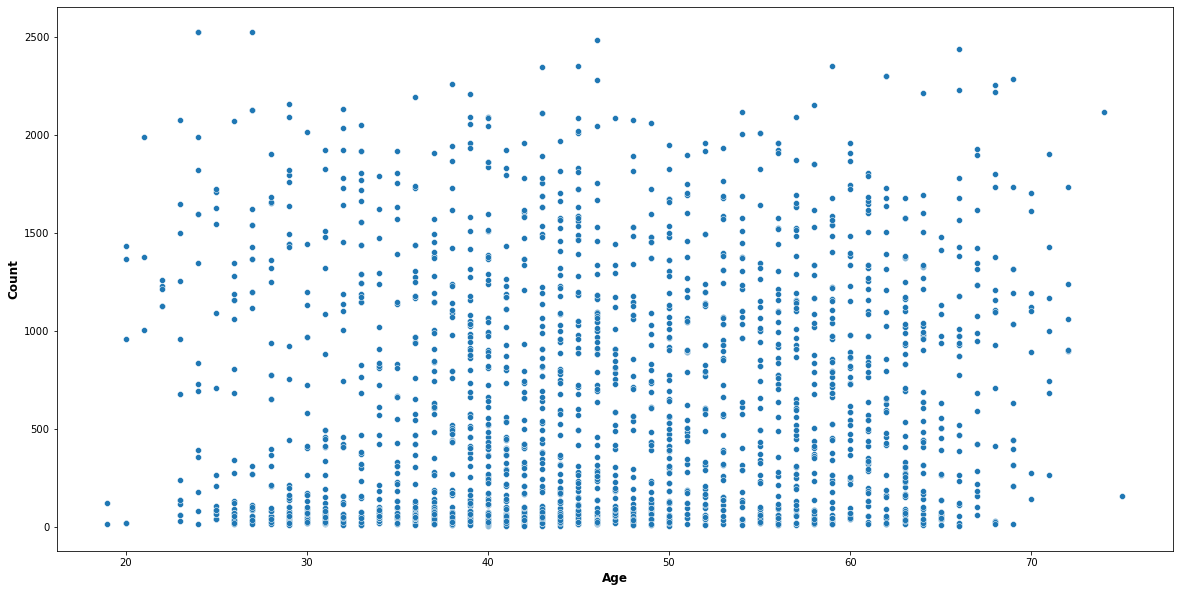

In [50]:
#Education Graph
plt.figure(figsize=(20,10))
sns.scatterplot(x=data.Age, y=data.Spent)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Age", weight="bold", fontsize=12)
plt.show()

*Observation : It seems to be no relationship brtween Age and Total spendings*

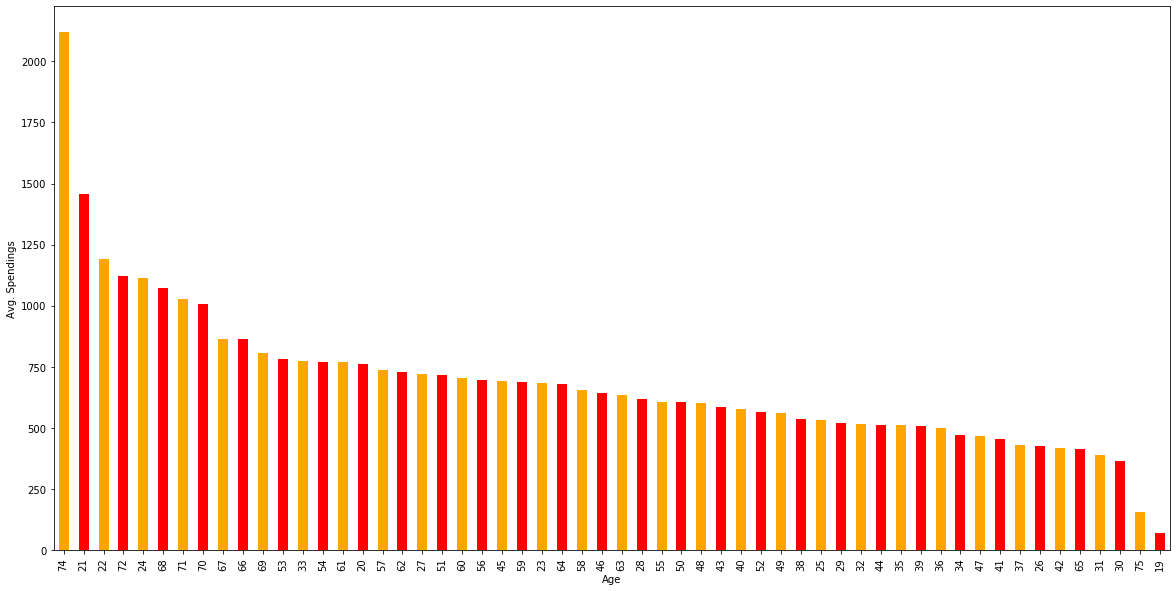

In [51]:
# Total spendings wrt age
plt.figure(figsize=(20,10))
data.groupby('Age')['Spent'].mean().sort_values(ascending=False).plot.bar(color=['orange','red'])
plt.ylabel('Avg. Spendings')
plt.show()

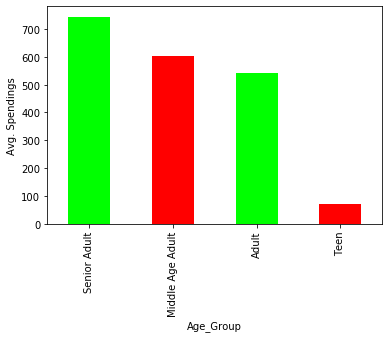

In [52]:
# Total spendings wrt age group

data.groupby('Age_Group')['Spent'].mean().sort_values(ascending=False).plot.bar(color=['lime','red'])
plt.ylabel('Avg. Spendings')
plt.show()

*Observation : Senior Adults have high avg spendings, followed by Middle age adults and adult. Teens have very less spendings*

Text(0, 0.5, 'Counts')

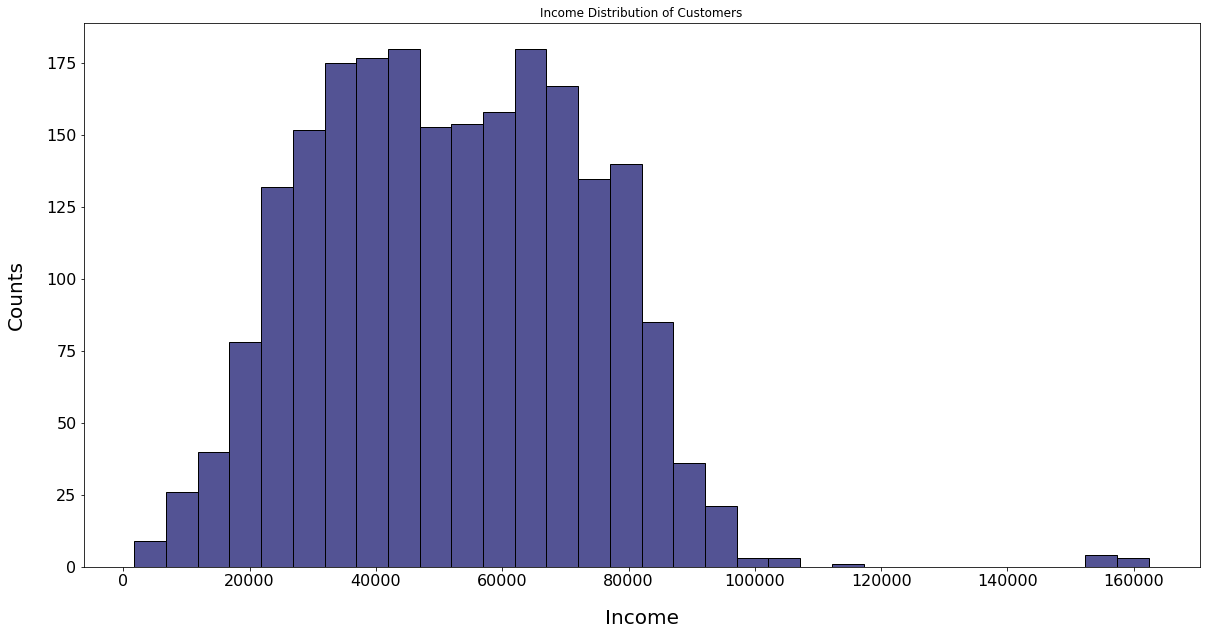

In [53]:
# Income distribution

plt.figure(figsize=(20, 10))
ax = sns.histplot(data = data.Income, color = "midnightblue")
ax.set(title = "Income Distribution of Customers")

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20)

Text(0, 0.5, 'Spendings')

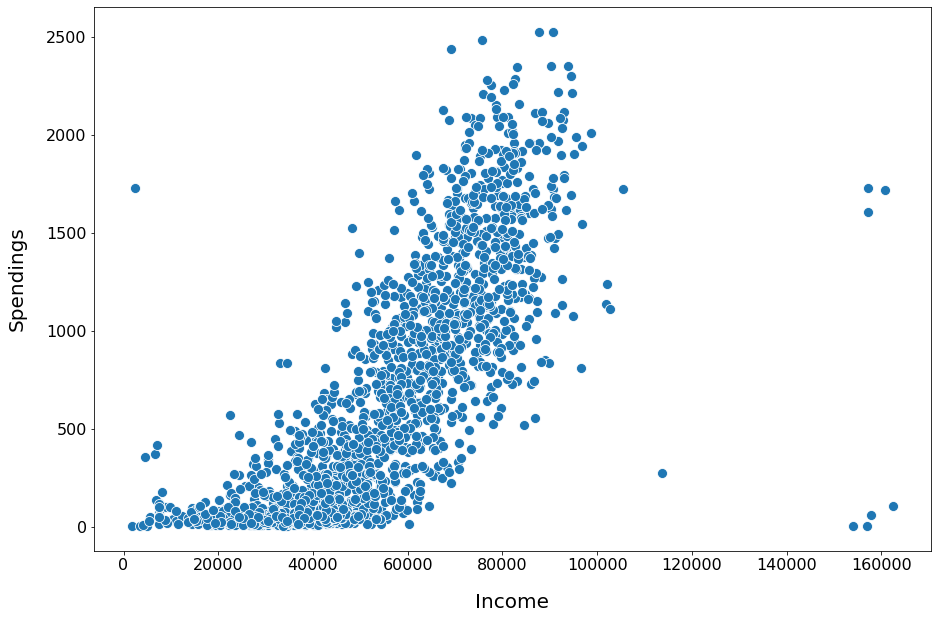

In [54]:
# Relationship between Income and Total spendings

plt.figure(figsize=(15,10))
sns.scatterplot(x=data.Income, y=data.Spent, s=100)
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)

*Observation : We can see linear relationship between Income and total spendings. Customer with higher income spends most.*

Text(0, 0.5, 'Average Spending')

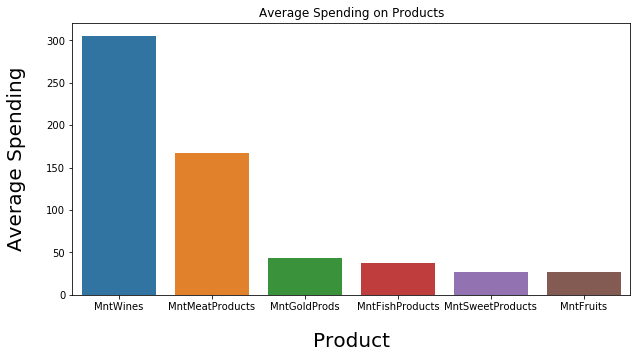

In [55]:
## Visualization of products

products = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_data = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

plt.figure(figsize=(10,5))
plt.title('Average Spending on Products')
sns.barplot(data=product_means_data, x='Product', y='Average Spending')
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20)

Text(0, 0.5, 'Spendings')

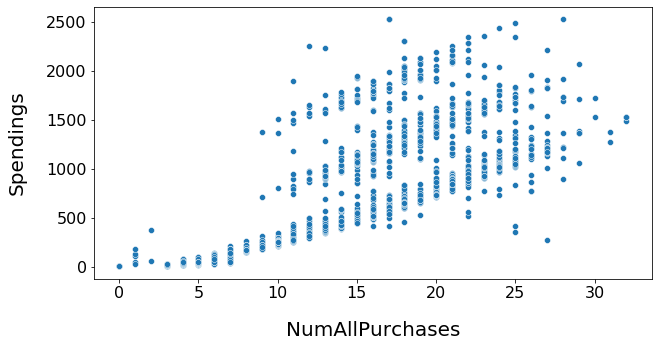

In [56]:
#Total spending wrt Number of purchases made
plt.figure(figsize=(10,5))
sns.scatterplot(x=data.NumAllPurchases, y=data.Spent)
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('NumAllPurchases', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20)

*Observation: From the above we can see as the total no of purchases increases, total spendings also increases*

In [57]:
data.NumWebVisitsMonth.unique()

array([ 7,  5,  4,  6,  8,  9, 20,  2,  3,  1, 10,  0, 14, 19, 17, 13],
      dtype=int64)

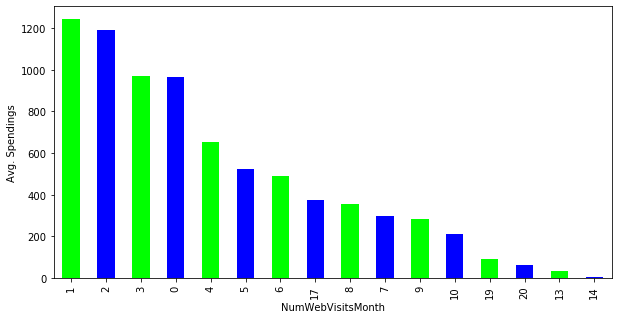

In [58]:
#Number of visits to company’s website in the last month
plt.figure(figsize=(10,5))
data.groupby('NumWebVisitsMonth')['Spent'].mean().sort_values(ascending=False).plot.bar(color=['lime','blue'])
plt.ylabel('Avg. Spendings')
plt.show()

*Observation : Customers who visits the web page of product in the intial months tends to have higher avg. spendings. After 4 months the avg. spendings tends to decrease.*

In [59]:
data.Complain.unique()

array([0, 1], dtype=int64)

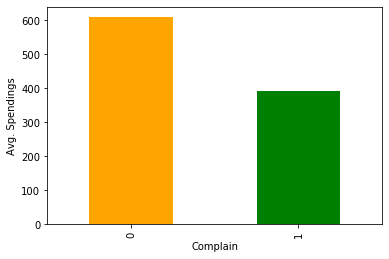

In [60]:
## Total spendings wrt Complain

data.groupby('Complain')['Spent'].mean().sort_values(ascending=False).plot.bar(color=['orange','green'])
plt.ylabel('Avg. Spendings')
plt.show()

*Observation : 0 is for those customers who does not complain and 1 is for those who complain.
Customers who does not complain have high spendings than those who complain.*

In [61]:
Cmp_columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

acceptance_campaign=(data[Cmp_columns].sum() / len(data))*100

data_acc_campaign = pd.DataFrame(acceptance_campaign)

data_acc_campaign.reset_index().rename(columns={'index':'Campaign', 0:'Percentage'})

,Campaign,Percentage
0,AcceptedCmp1,6.419530
1,AcceptedCmp2,1.356239
2,AcceptedCmp3,7.368897
3,AcceptedCmp4,7.414105
4,AcceptedCmp5,7.278481


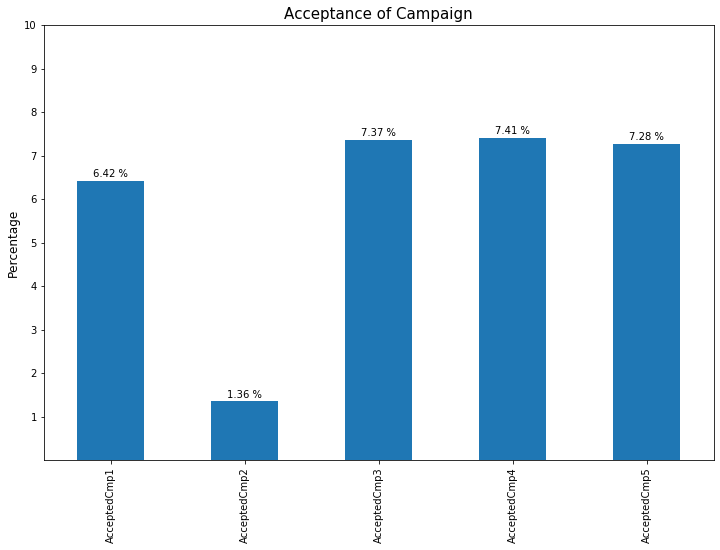

In [62]:
# Bar Plot
plt.figure(figsize=(12,8))

ax = acceptance_campaign.plot(kind='bar')
plt.title('Acceptance of Campaign', size=15)
plt.ylabel('Percentage', size=12)
plt.yticks(ticks=range(1,11,1))

# iterasi tiap bar satu persatu
for bar in ax.patches:

    ax.annotate(
        f'{bar.get_height():.2f} %',                  
        (
            bar.get_x() + (bar.get_width()/2),     
            bar.get_height()  + 0.15                 
        ),
        ha = 'center',                              
        va = 'center'                               
    )

plt.show()

In [63]:
data.dtypes

ID                              int64
Year_Birth                      int64
Education                       int64
Marital_Status                  int64
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [64]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Spent', 'NumAllPurchases', 'TotalAcceptedCmp', 'Children',
       'Family_member', 'Age_Group'],
      dtype='object')

In [65]:
data.Z_Revenue.unique()    #It has only one value so we can drop it

array([11], dtype=int64)

In [66]:
data.Z_CostContact.unique()         #It has only one value so we can drop it also

array([3], dtype=int64)

In [67]:
data.Recency.unique()
#`Recency`is the Number of days since customer's last purchase

array([58, 38, 26, 94, 16, 34, 32, 19, 68, 59, 82, 53, 23, 51, 20, 91, 86,
       41, 42, 63,  0, 69, 89,  4, 96, 56, 31,  8, 55, 37, 76, 99,  3, 88,
       72, 24, 92, 39, 29,  2, 54, 57, 30, 12, 18, 75, 90,  1, 40,  9, 87,
        5, 95, 48, 70, 79, 84, 44, 43, 35, 15, 17, 46, 27, 25, 74, 85, 65,
       13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 80, 45,
       14, 52, 93, 50, 60, 11, 66, 97, 62,  6, 33, 22, 71, 67,  7],
      dtype=int64)

In [68]:
data.Response.unique()      
#It has only two value which indicates true false value that they response or not so we can drop it

array([1, 0], dtype=int64)

In [69]:
data1 = data.drop(['ID','Year_Birth','Recency','Kidhome','Teenhome', 'Family_member','Dt_Customer','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Z_CostContact','Z_Revenue','Response','Age_Group'], axis=1)

As 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds' are products and 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth' are purchase detail that customer made purchase from where and 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2' are like true false value that indicates that customer accept offer or not. So we can drop these column for building model.

In [70]:
data1.head()

,Education,Marital_Status,Income,NumWebVisitsMonth,Complain,Age,Spent,NumAllPurchases,TotalAcceptedCmp,Children
0,1,1,58138.0,7,0,58,1617,22,1,0
1,1,1,46344.0,5,0,61,27,4,0,2
2,1,2,71613.0,4,0,50,776,20,0,0
3,1,2,26646.0,6,0,31,53,6,0,1
4,2,2,58293.0,5,0,34,422,14,0,1


In [71]:
data1.describe()

,Education,Marital_Status,Income,NumWebVisitsMonth,Complain,Age,Spent,NumAllPurchases,TotalAcceptedCmp,Children
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,1.268083,1.645570,51958.810579,5.321429,0.009042,46.086347,607.268083,12.566908,0.448915,0.947559
std,0.651348,0.478449,21527.278844,2.425597,0.094678,11.701599,602.513364,7.205427,0.893017,0.749466
min,0.000000,1.000000,1730.000000,0.000000,0.000000,19.000000,5.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,35233.500000,3.000000,0.000000,38.000000,69.000000,6.000000,0.000000,0.000000
50%,1.000000,2.000000,51371.000000,6.000000,0.000000,45.000000,397.000000,12.000000,0.000000,1.000000
75%,2.000000,2.000000,68487.000000,7.000000,0.000000,56.000000,1048.000000,18.250000,1.000000,1.000000
max,2.000000,2.000000,162397.000000,20.000000,1.000000,75.000000,2525.000000,32.000000,5.000000,3.000000


In [72]:
# Finding correlation

correlation = data1.corr()
correlation

,Education,Marital_Status,Income,NumWebVisitsMonth,Complain,Age,Spent,NumAllPurchases,TotalAcceptedCmp,Children
Education,1.000000,-0.011353,0.158032,-0.052848,-0.039323,0.193320,0.095419,0.092979,0.058935,0.061240
Marital_Status,-0.011353,1.000000,-0.004803,0.003118,0.000885,0.003692,-0.020930,-0.001908,-0.060392,0.042741
Income,0.158032,-0.004803,1.000000,-0.650257,-0.027900,0.199977,0.792740,0.742691,0.343150,-0.343529
NumWebVisitsMonth,-0.052848,0.003118,-0.650257,1.000000,0.020820,-0.120282,-0.498769,-0.427457,-0.126571,0.415558
Complain,-0.039323,0.000885,-0.027900,0.020820,1.000000,0.004602,-0.034135,-0.018125,-0.015932,0.032181
Age,0.193320,0.003692,0.199977,-0.120282,0.004602,1.000000,0.115901,0.175602,-0.006957,0.092676
Spent,0.095419,-0.020930,0.792740,-0.498769,-0.034135,0.115901,1.000000,0.823361,0.453273,-0.499931
NumAllPurchases,0.092979,-0.001908,0.742691,-0.427457,-0.018125,0.175602,0.823361,1.000000,0.298595,-0.382854
TotalAcceptedCmp,0.058935,-0.060392,0.343150,-0.126571,-0.015932,-0.006957,0.453273,0.298595,1.000000,-0.254040
Children,0.061240,0.042741,-0.343529,0.415558,0.032181,0.092676,-0.499931,-0.382854,-0.254040,1.000000


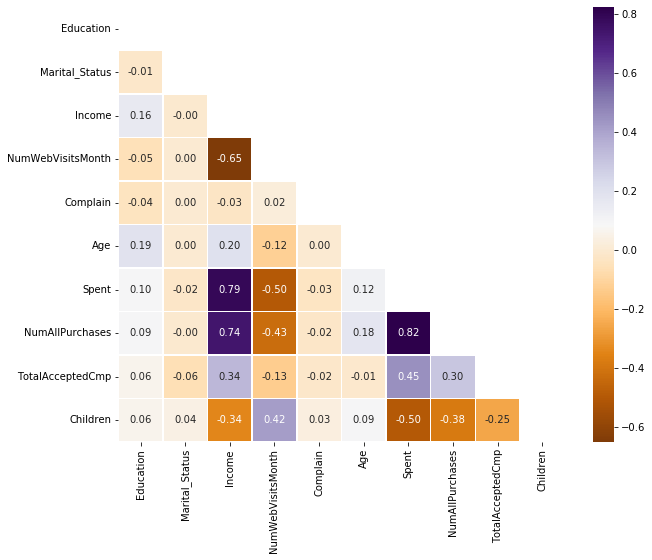

In [73]:
# Using Heatmap Correlation Analysis

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation))
sns.heatmap(correlation,mask= mask, annot=True, fmt='.2f', linewidths=0.5, cmap='PuOr')

data1.to_csv('H:\Intern Project\customer personality analysis/Cluster_data.csv', index=False)
data.to_csv('H:\Intern Project\customer personality analysis/Transformed_Data.csv', index=False)


## Clustering

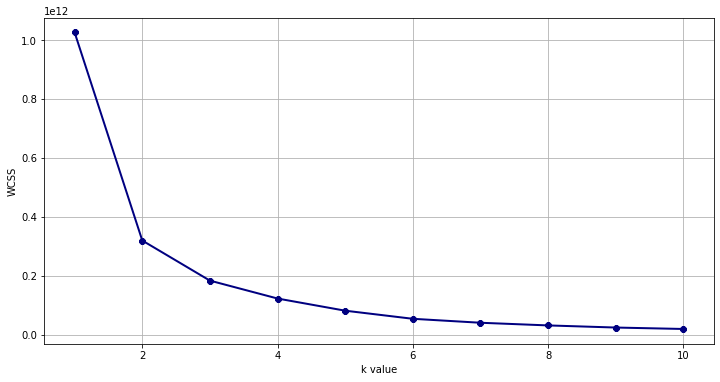

In [100]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='navy', marker='8')
plt.xlabel('k value')
plt.ylabel('WCSS')
plt.show()

In [75]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(data1)
label

array([3, 0, 3, ..., 3, 3, 3])

In [76]:
cluster_data = data1.copy()
cluster_data['cluster'] = label

In [77]:
print(kmeans.cluster_centers_)

[[1.36390533e+00 1.62869822e+00 4.21910089e+04 6.36538462e+00
  1.18343195e-02 4.64023669e+01 2.24294379e+02 8.56508876e+00
  2.55917160e-01 1.32840237e+00]
 [1.31604938e+00 1.63703704e+00 8.27170370e+04 2.69135802e+00
  4.93827160e-03 4.71160494e+01 1.42005185e+03 1.95481481e+01
  1.21234568e+00 3.11111111e-01]
 [9.71739130e-01 1.65000000e+00 2.33819522e+04 7.07826087e+00
  1.08695652e-02 4.05391304e+01 7.60869565e+01 5.35000000e+00
  1.86956522e-01 9.86956522e-01]
 [1.34575261e+00 1.66467958e+00 6.28251401e+04 4.65275708e+00
  7.45156483e-03 4.89493294e+01 8.66666170e+02 1.73323398e+01
  3.62146051e-01 9.21013413e-01]]


In [78]:
data['Clusters'] = cluster_data.cluster

Text(0.5, 1.0, 'Clusters with Spent')

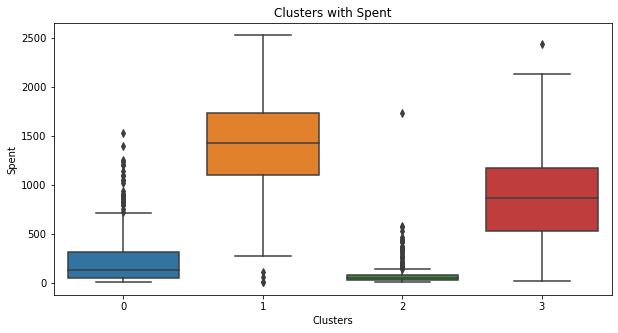

In [79]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Clusters' , y='Spent', data=data)
plt.ylabel('Spent')
plt.xlabel('Clusters')
plt.title('Clusters with Spent')

Text(0.5, 1.0, 'Clusters with income')

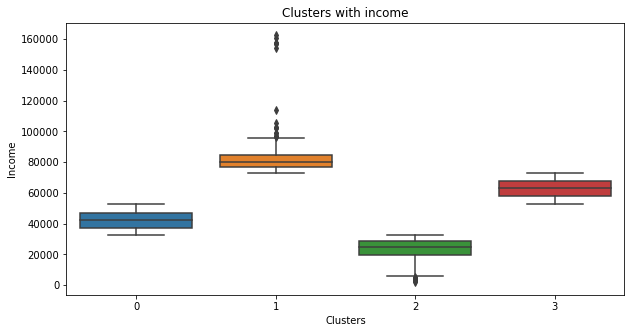

In [80]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Clusters' , y='Income', data=data)
plt.ylabel('Income')
plt.xlabel('Clusters')
plt.title('Clusters with income')

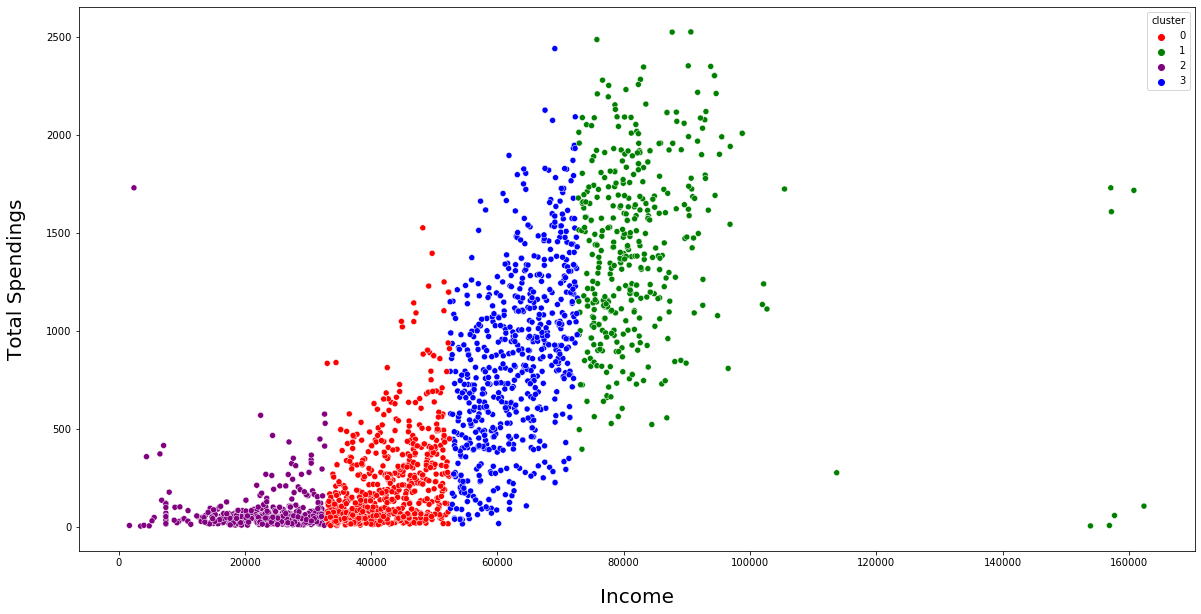

In [102]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cluster_data, x='Income', y='Spent', hue='cluster',palette=['red','green','purple','blue']);
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);

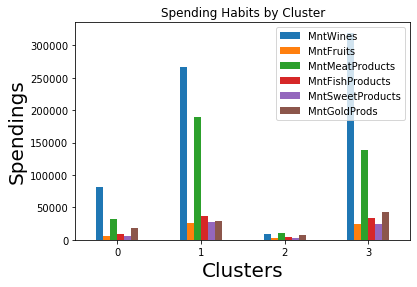

In [108]:
product_spendings = data.groupby('Clusters')[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

product_spendings.plot(kind='bar')

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20)
plt.ylabel('Spendings', fontsize=20)
#plt.xticks(rotation=0, ha='center')
plt.show()

Text(0.5, 1.0, 'Clusters with Age')

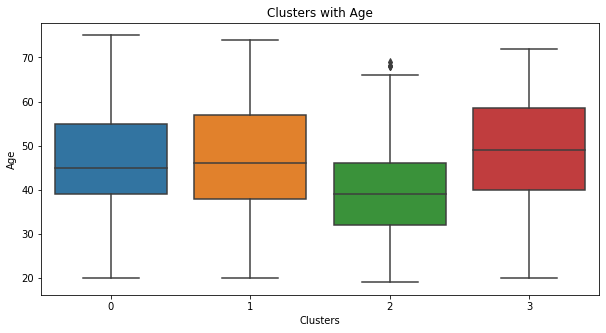

In [83]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Clusters' , y='Age', data=data)
plt.ylabel('Age')
plt.xlabel('Clusters')
plt.title('Clusters with Age')

Text(0.5, 1.0, 'Clusters with NumAllPurchases')

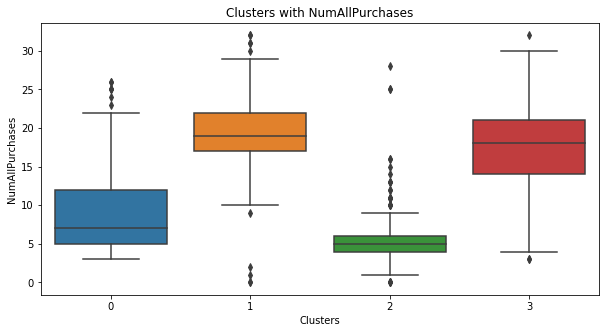

In [84]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Clusters' , y='NumAllPurchases', data=data)
plt.ylabel('NumAllPurchases')
plt.xlabel('Clusters')
plt.title('Clusters with NumAllPurchases')

**Thank you😊😊**